In [135]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import sqlite3 
import numpy as np
import io
import os

In [13]:
conn = sqlite3.connect('test.db')
dbcursor = conn.cursor()

In [3]:
def create_table(dbcursor):
    dbcursor.execute("CREATE TABLE IF NOT EXISTS UNGM(Transform REAL, Seed INT, RMSE REAL, NLL REAL)")

In [4]:
query = ("INSERT INTO UNGM "  
         "(Transform, Seed, RMSE, NLL)"  
         "VALUES (?, ?, ?, ?)")
data = ('Unscented Transform', 11, 3.5, 1.20)

In [5]:
def insert_data(db, query, data):
    db.execute(query, data)
    

In [ ]:
def build_query(db, table, columns_list)

In [6]:
create_table(dbcursor)

In [7]:
insert_data(dbcursor, query, data)

In [9]:
conn.commit()
dbcursor.close()
conn.close()

In [15]:
def adapt_array(arr):
    """
    http://stackoverflow.com/a/31312102/190597 (SoulNibbler)
    """
    out = io.BytesIO()
    np.save(out, arr)
    out.seek(0)
    return sqlite3.Binary(out.read())


def convert_array(blob):
    out = io.BytesIO(blob)
    out.seek(0)
    return np.load(out)

In [11]:
table = 'UNGM'
"INSERT INTO {0:s}".format(table)
""

'INSERT INTO UNGM'

In [16]:
sqlite3.register_adapter(np.ndarray, adapt_array)
sqlite3.register_converter("NParray", convert_array)


In [33]:
con = sqlite3.connect(":memory:", detect_types=sqlite3.PARSE_DECLTYPES)
cur = con.cursor()
cur.execute("create table test (arr NParray)")

In [34]:
x = np.arange(12).reshape(2,6)

In [35]:
cur.execute("insert into test (arr) values (?)", (x, ))

In [36]:
# con.commit()

In [37]:
cur.execute("select arr from test")
data = cur.fetchone()[0]

In [38]:
print(data)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [88]:
import pickle
def adapt_array(arr):
    """
    http://stackoverflow.com/a/31312102/190597 (SoulNibbler)
    """
    out = io.BytesIO()
    np.save(out, arr)
    out.seek(0)
    return sqlite3.Binary(out.read())


def convert_array(blob):
    out = io.BytesIO(blob)
    out.seek(0)
    return np.load(out)


def convert_list(blob):
    return pickle.loads(blob)


def adapt_list(nodes):
    bdata = pickle.dumps(nodes, pickle.HIGHEST_PROTOCOL)
    return sqlite3.Binary(bdata)


sqlite3.register_adapter(np.ndarray, adapt_array)
sqlite3.register_converter("NParray", convert_array)
sqlite3.register_converter("Nodes", convert_list)
sqlite3.register_converter("pickle", pickle.loads)
sqlite3.register_adapter(list, adapt_list)

In [250]:
con = sqlite3.connect("temp.db", detect_types=sqlite3.PARSE_DECLTYPES)
db = con.cursor()

In [100]:
db.execute("SELECT RMSE from UNGM_EXP WHERE Iter = 1 AND Transform = 'UT'")

In [91]:
db.fetchone()

In [151]:
trans, power, damping, seed = 'UT', 0.4, 0.5, 11

In [152]:
str_1 = "SELECT RMSE, NLL from UNGM_EXP WHERE Transform='{}' AND Seed = {} AND Power ={} AND Damping = {}".format(trans, seed, power, damping )

In [153]:
db.execute(str_1)

In [154]:
data = db.fetchall()

In [155]:
len(data)

0

In [148]:
rm, nl = zip(*data)

In [133]:
# db.execute("SELECT Nodes from UNGM_EXP WHERE Iter = 1 AND Transform = 'TT'")

In [93]:
nodes = db.fetchone()

In [ ]:
all_iters = """
SELECT RMSE, NLL, Iter from 
UNGM_EXP
WHERE Transform = {} AND Seed = {} AND Damping = {} AND Power = {}
"""

In [167]:
def get_all_iterations(transform, seed, power, damping, db):
    
    all_iters = """
                    SELECT RMSE, NLL, Iter from 
                    UNGM_EXP
                    WHERE Transform = '{}' AND Seed = {} AND Damping = {} AND Power = {}
                """
    db.execute(all_iters.format(transform, seed, damping, power))
    data = db.fetchall()
    return data

In [198]:
def plot_iterations_rmse(transform, seed, power, damping, db, num=50):
    data = get_all_iterations(transform, seed, power, damping, db)
    rm, nll, iters = zip(*data)
    
#     plt.plot((0, len(rm)), (rm[0], rm[0]), 'k-')
    label_str = "EP Iterations p_{}__d_{}".format(power, damping)
    plt.plot(rm[:num], label=label_str)
    plt.legend(loc='best')
    
    

In [199]:
# con.close()

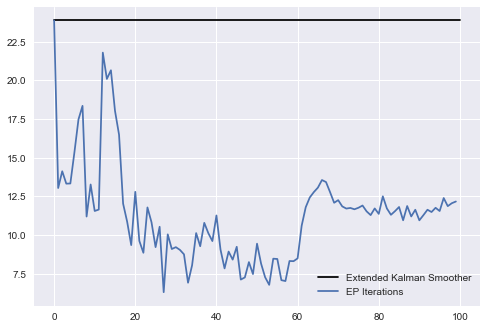

In [200]:
plt.plot((0, len(rm)), (rm[0], rm[0]), 'k-', label='Extended Kalman Smoother')
plt.plot(rm, label='EP Iterations')
plt.legend(loc='best')

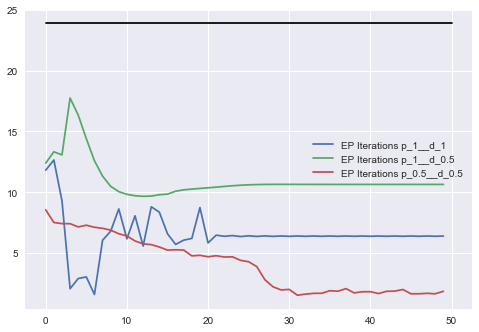

In [252]:
plot_iterations_rmse('TT', 11, 1, 1, con.cursor())
plot_iterations_rmse('TT', 11, 1, 0.5, con.cursor())
plot_iterations_rmse('UT', 11, 0.5, 0.5, con.cursor())
plt.plot((0, 50), (rm[0], rm[0]), 'k-', label='Extended Kalman Smoother')

In [296]:
methods = [None, 'none','nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
def plot_power_sweep(img, methods):
    plt.imshow(img, interpolation=methods[9],
               extent=[0.1,1,0.1,1], cmap='jet',
               vmax=np.max(img), vmin=np.min(img),origin='lower')
    
    ax = plt.gca()
    ax.set_xlabel('Power')
    ax.set_ylabel('Damping')
    ax.grid(False)
    plt.colorbar()

In [297]:
def plot_sweep(transform, seed, iters=10, kind='rmse'):
    all_iters = """
                    SELECT RMSE, NLL, Power, Damping from 
                    UNGM_EXP
                    WHERE Transform = '{}' AND Seed = {} AND Iter = {}
                """
    db.execute(all_iters.format(transform, seed, iters))
    data = db.fetchall()
    rms, nl, p, d = zip(*data)
    nl = np.array(nl)
    rms = np.array(list(reversed(rms)))
    p = np.array(p)
    d = np.array(d)
    p = p.reshape(10, 10)
    d = d.reshape(10, 10)
    p_nll = nl.reshape(10, 10)
    p_rmse = rms.reshape(10, 10)
    plt.figure(0)
    if kind == 'rmse':
        plot_power_sweep((p_rmse.T), methods)
    else:
        plot_power_sweep(np.log(p_nll), methods)
    plt.figure(1)
    
    cp = plt.contourf(p, d, p_rmse, cmap='jet')
    plt.colorbar(cp)
    
#     return data

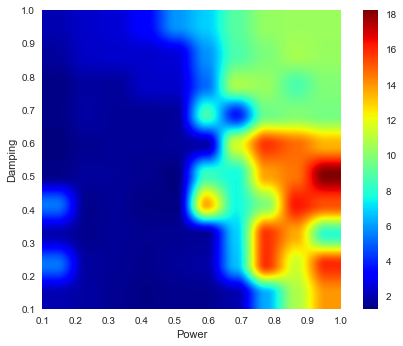

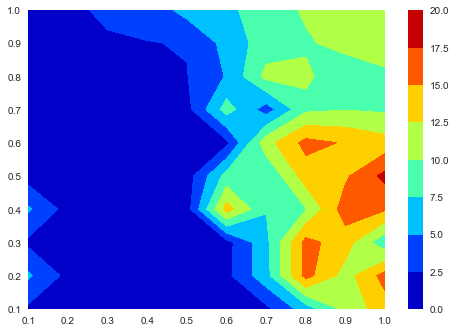

In [298]:
plot_sweep('UT', 11, iters=100)

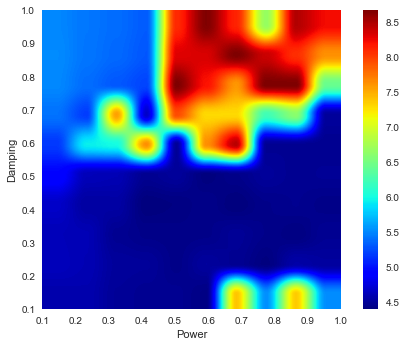

In [268]:
plot_sweep('UT', 11, iters=100, kind='2')

In [205]:
data_1 = plot_sweep('TT', 11)

In [208]:
rms, nl, p, d = zip(*data_1)

In [213]:
ll = np.array(nl)
Rmse = np.array(rms)

In [218]:
p_nll = ll.reshape(10, 10)
prmse = Rmse.reshape(10, 10)

In [219]:
prmse.shape

(10, 10)

In [221]:
prmse

array([[  1.53356207e+01,   9.91850613e+00,   1.70880354e+01,
          1.79415003e+01,   2.26099899e+02,   1.07796901e+01,
          1.86699765e+01,   1.49285687e+01,   1.53232578e+01,
          1.25648581e+01],
       [  1.82516161e+01,   1.37985543e+01,   1.66973187e+01,
          1.18344819e+01,   1.52704871e+01,   1.76381872e+01,
          7.28364464e+00,   1.65541742e+01,   1.96087530e+01,
          1.70087304e+01],
       [  1.09764196e+01,   1.46853473e+01,   1.15819084e+01,
          4.99896095e+00,   1.19323817e+01,   1.07927188e+01,
          1.52157632e+01,   1.52113497e+01,   1.26563185e+01,
          9.69200203e+00],
       [  1.08851353e+01,   1.36813665e+01,   1.41421324e+01,
          1.14382378e+01,   1.36828988e+01,   1.23392859e+01,
          1.26616683e+01,   1.46742305e+01,   1.36170526e+01,
          1.30746766e+01],
       [  9.02860906e+00,   1.49326053e+01,   1.42725403e+01,
          5.32308625e+00,   1.15336345e+01,   7.86589360e+00,
          3.87900185e+00

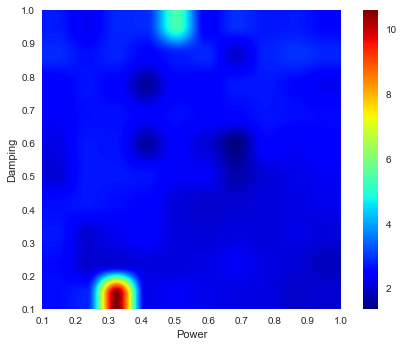

In [239]:
plot_power_sweep(np.log(prmse), methods)

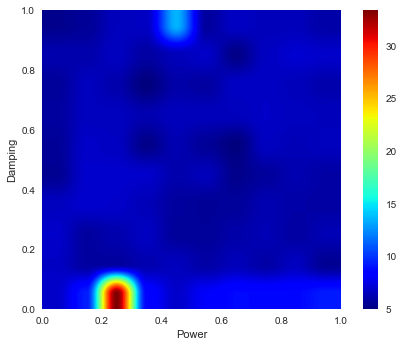

In [237]:
plot_power_sweep(np.log(p_nll), methods)

TypeError: Input z must be a 2D array.

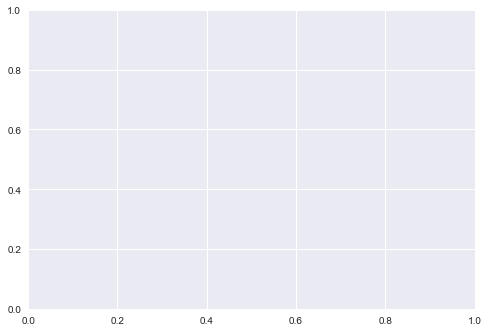

In [212]:
plt.contourf(p, d, rms)